In [1]:
%load_ext autoreload

In [2]:
%autoreload
from tqdm.notebook import tqdm
import numpy as np
from randomwalk_2d import randomwalk_2D
from randomwalk_3d import randomwalk_3D

import seaborn as sns
from collections import Counter
import itertools
import matplotlib.pyplot as plt

sns.set()
sns.set_context("talk")

In [3]:
def generate_tree_randomwalk2d(PS):
    x, y = [40, 60]
    dla = randomwalk_2D(seed=[x // 2, y - 1], x = x, y = y, PS = PS)

    # number of points
    for i in tqdm(range(150)):
        while (dla.walking == True):
            
            # walk with maximum probability of sticking to cluster (1 - p_stick = 0)
            dla.walker(0, i + 1)
            
        dla.walking = True
        
    return dla

In [4]:
def generate_tree_randomwalk3d(PS):
    x, y, z = [40, 60, 40]
    dla = randomwalk_3D(seed=[x // 2, y - 1, z // 2], x = x, y = y, z = z, PS = PS)

    # number of points
    for i in tqdm(range(150)):
        while (dla.walking == True):
            
            # walk with maximum probability of sticking to cluster (1 - p_stick = 0)
            dla.walker(0, i + 1)
            
        dla.walking = True
        
    return dla

In [5]:
simulations = 5
PSs = [10, 20, 30, 40, 50]

generated_trees = dict()


In [6]:
for PS in PSs:
    generated_trees[PS] = []

for PS in PSs:
    for _ in range(simulations):
        
        # change model here
        generated_trees[PS].append(generate_tree_randomwalk2d(PS))
        
generated_trees

{10: [<randomwalk_2d.randomwalk_2D at 0x2222ae0ae48>,
 20: [<randomwalk_2d.randomwalk_2D at 0x2222ae7abe0>,
 30: [<randomwalk_2d.randomwalk_2D at 0x2222aed13c8>,
 40: [<randomwalk_2d.randomwalk_2D at 0x2222af1f048>,
 50: [<randomwalk_2d.randomwalk_2D at 0x2222af6e940>,
  <randomwalk_2d.randomwalk_2D at 0x2222afb1be0>]}

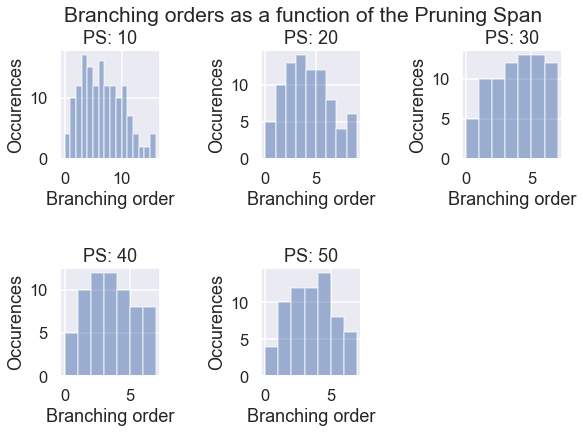

In [7]:
fig, ax = plt.subplots(2, 3, figsize = (9, 6))
ax = ax.flatten()
counter  = 0
for PS in PSs:

    branch_orders = []
    for tree in generated_trees[PS]:
        branch_orders += tree.tree.get_branch_orders()
    
    
    c = Counter(branch_orders)
    c = sorted(c.items())
    x, y = zip(*c)
    ax[counter].hist(branch_orders, alpha = 0.5, bins = max(branch_orders))
    ax[counter].set_title("PS: {}".format(PS))
    ax[counter].set_xlabel("Branching order")
    ax[counter].set_ylabel("Occurences")
    counter += 1

fig.delaxes(ax[counter])
fig.subplots_adjust(wspace = 1, hspace = 1)
fig.suptitle("Branching orders as a function of the Pruning Span", fontsize=21)
fig.savefig("../results/BO_random_2D.png", bbox_inches="tight")
plt.ylabel("Occurences")
plt.show()

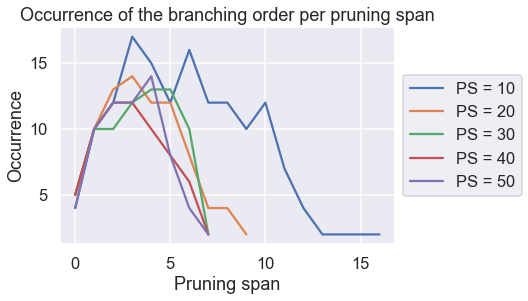

In [8]:
plt.figure()
for PS in PSs:

    branch_orders = []
    for tree in generated_trees[PS]:
        branch_orders += tree.tree.get_branch_orders()
    
    
    c = Counter(branch_orders)
    c = sorted(c.items())
    x, y = zip(*c)
    plt.plot(x, y, label='PS = {}'.format(PS))

plt.title("Occurrence of the branching order per pruning span")
plt.ylabel("Occurrence")
plt.xlabel("Pruning span")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.savefig("../results/occurrence_random_2D.png", bbox_inches="tight")
plt.show()

In [9]:
means = []
errors = []
for PS in PSs:
    asym = []

    for tree in generated_trees[PS]:
        asym.append(tree.tree.get_asymmetry_index())
    
    mean = np.mean(asym)
    std = np.std(asym)
    means.append(mean)
    errors.append(std)
    print("Asymmetry index = {} +- {}. For PS = {}".format(mean, std, PS))
    

Asymmetry index = 0.7167477860976313 +- 0.09594205336429389. For PS = 10
Asymmetry index = 0.6642135642135641 +- 0.16338421673716794. For PS = 20
Asymmetry index = 0.7549999999999999 +- 0.09769567259835225. For PS = 30
Asymmetry index = 0.7266666666666666 +- 0.11234866364235145. For PS = 40
Asymmetry index = 0.6114285714285714 +- 0.19688273614358173. For PS = 50


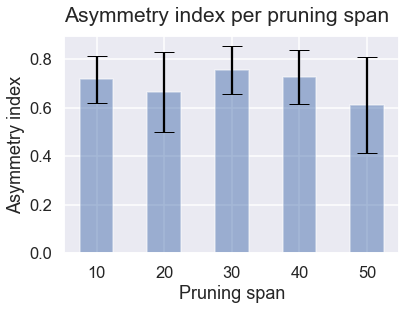

In [10]:
fig, ax = plt.subplots()
ax.bar(PSs, means, yerr=errors, width = 5, alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Asymmetry index')
ax.set_xlabel('Pruning span')
ax.set_xticks(PSs)
ax.yaxis.grid(True)
fig.suptitle("Asymmetry index per pruning span", fontsize=21)
fig.savefig("../results/AI_random_2D.png", bbox_inches="tight")
plt.show()

In [11]:
# beware for change in function name, leafs!=terminal segments
means = []
errors = []

for PS in PSs:
    leafs = []

    for tree in generated_trees[PS]:
        leafs.append(tree.tree.get_number_of_terminal_segments())
    
    mean = np.mean(leafs)
    std = np.std(leafs)
    means.append(mean)
    errors.append(std)
    
    print("Terminal leafs = {} +- {}. For PS = {}".format(mean, std, PS))


Terminal leafs = 16.0 +- 2.8284271247461903. For PS = 10
Terminal leafs = 9.0 +- 1.7888543819998317. For PS = 20
Terminal leafs = 8.2 +- 1.5999999999999999. For PS = 30
Terminal leafs = 7.0 +- 1.0954451150103321. For PS = 40
Terminal leafs = 7.2 +- 0.9797958971132712. For PS = 50


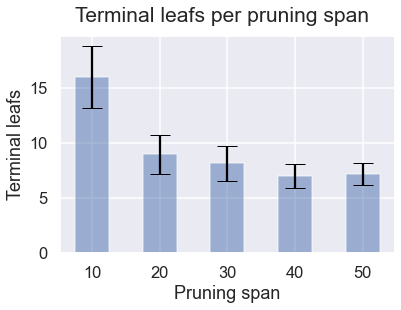

In [12]:
fig, ax = plt.subplots()
ax.bar(PSs, means, yerr=errors, width = 5, alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Terminal leafs')
ax.set_xlabel('Pruning span')
ax.set_xticks(PSs)
ax.yaxis.grid(True)
fig.suptitle("Terminal leafs per pruning span", fontsize=21)
fig.savefig("../results/TL_random_2D.png", bbox_inches="tight")
plt.show()